In [1]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
base_dir = os.path.dirname(os.getcwd())
movies_path = os.path.join(base_dir, 'data', 'Movies_final.csv')
df = pd.read_csv(movies_path)
df.info()
df.head(87000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86493 entries, 0 to 86492
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    86493 non-null  int64  
 1   title                 86493 non-null  object 
 2   vote_average          86493 non-null  float64
 3   vote_count            86493 non-null  int64  
 4   status                86493 non-null  object 
 5   release_date          86427 non-null  object 
 6   revenue               86493 non-null  int64  
 7   runtime               86493 non-null  int64  
 8   adult                 86493 non-null  bool   
 9   backdrop_path         70442 non-null  object 
 10  budget                86493 non-null  int64  
 11  homepage              17774 non-null  object 
 12  imdb_id               86467 non-null  object 
 13  original_language     86493 non-null  object 
 14  original_title        86493 non-null  object 
 15  overview           

id                                    title  vote_average  \
0       27205                                Inception         8.364   
1      157336                             Interstellar         8.417   
2         155                          The Dark Knight         8.512   
3       19995                                   Avatar         7.573   
4       24428                             The Avengers         7.710   
...       ...                                      ...           ...   
86488  806914                                 Avicenna         0.000   
86489  273772                             Black Nation         0.000   
86490  273774                                Blind Man         0.000   
86491  806417  121: Overcoming Drug Addiction by Faith         0.000   
86492  273926                           Shelter Island         0.000   

       vote_count    status release_date     revenue  runtime  adult  \
0           34495  Released   2010-07-15   825532764      148  False   
1           32571  Released   2014-11-05   701729206      169  False   
2           30619  Released   2008-07-16  1004558444      152  False   
3           29815  Released   2009-12-15  2923706026      162  False   
4           29166  Released   2012-04-25  1518815515      143  False   
...           ...       ...          ...         ...      ...    ...   
86488           0  Released   1957-12-09           0       92  False   
86489           0  Released   2008-01-01           0       62  False   
86490           0  Released   2007-01-01           0        0  False   
86491           0  Released   2021-03-05           0       80  False   
86492           0  Released   2011-01-01           0        0  False   

                          backdrop_path     budget  \
0      /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  160000000   
1      /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  165000000   
2      /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  185000000   
3      /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  237000000   
4      /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  220000000   
...                                 ...        ...   
86488                               NaN          0   
86489                               NaN          0   
86490                               NaN          0   
86491                               NaN          0   
86492                               NaN          0   

                                             homepage     imdb_id  \
0         https://www.warnerbros.com/movies/inception   tt1375666   
1                   http://www.interstellarmovie.net/   tt0816692   
2      https://www.warnerbros.com/movies/dark-knight/   tt0468569   
3                https://www.avatar.com/movies/avatar   tt0499549   
4          https://www.marvel.com/movies/the-avengers   tt0848228   
...                                               ...         ...   
86488                                             NaN   tt0312400   
86489                                             NaN   tt1388768   
86490                                             NaN   tt1412699   
86491                                             NaN  tt14221692   
86492                                             NaN   tt1930482   

      original_language                           original_title  \
0                    en                                Inception   
1                    en                             Interstellar   
2                    en                          The Dark Knight   
3                    en                                   Avatar   
4                    en                             The Avengers   
...                 ...                                      ...   
86488                ru                                 –ê–≤–∏—Ü–µ–Ω–Ω–∞   
86489                en                             Black Nation   
86490                en                                Blind Man   
86491                en  121: Overcoming Drug Addiction by Faith   
86492                en                        

In [3]:
def count_zeros_and_empty(df):
    count_dict = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            zero_count = (df[col] == 0).sum()
            count_dict[col] = {'zeros': zero_count}

        elif pd.api.types.is_string_dtype(df[col]):
            empty_count = (df[col] == '').sum()
            count_dict[col] = {'empty_strings': empty_count}

    return count_dict

count_result = count_zeros_and_empty(df)
print(count_result)


{'id': {'zeros': 0}, 'title': {'empty_strings': 0}, 'vote_average': {'zeros': 2576}, 'vote_count': {'zeros': 2566}, 'status': {'empty_strings': 0}, 'revenue': {'zeros': 73454}, 'runtime': {'zeros': 1262}, 'adult': {'zeros': 86474}, 'budget': {'zeros': 71884}, 'original_language': {'empty_strings': 0}, 'original_title': {'empty_strings': 0}, 'popularity': {'zeros': 0}, 'movieId': {'zeros': 0}}


# Transformacja i dopasowanie do ratings

In [4]:
ratings_path = os.path.join(base_dir, 'data', 'ratings_groupped_ids.parquet')
df_ratings = pd.read_parquet(ratings_path)

In [5]:
# CHECKING movieID coverage

movie_ids_all = set(df['movieId'])

movie_ids_ratings = set(
    m for pos, neg in zip(df_ratings['pos'], df_ratings['neg'])
    for m in list(pos) + list(neg)
)
valid_movie_ids = movie_ids_all & movie_ids_ratings

print(f"Liczba wsp√≥lnych movieId: {len(valid_movie_ids)}")

df_ratings['pos'] = df_ratings['pos'].apply(lambda lst: [m for m in lst if m in valid_movie_ids])
df_ratings['neg'] = df_ratings['neg'].apply(lambda lst: [m for m in lst if m in valid_movie_ids])
df_ratings = df_ratings[(df_ratings['pos'].str.len() > 0) | (df_ratings['neg'].str.len() > 0)]

df = df[df['movieId'].isin(valid_movie_ids)]

Liczba wsp√≥lnych movieId: 82932


In [6]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82932 entries, 0 to 82931
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    82932 non-null  int64  
 1   title                 82932 non-null  object 
 2   vote_average          82932 non-null  float64
 3   vote_count            82932 non-null  int64  
 4   status                82932 non-null  object 
 5   release_date          82873 non-null  object 
 6   revenue               82932 non-null  int64  
 7   runtime               82932 non-null  int64  
 8   adult                 82932 non-null  bool   
 9   backdrop_path         68155 non-null  object 
 10  budget                82932 non-null  int64  
 11  homepage              17418 non-null  object 
 12  imdb_id               82907 non-null  object 
 13  original_language     82932 non-null  object 
 14  original_title        82932 non-null  object 
 15  overview           

# PoczƒÖtkowe usuniƒôcie niepotrzebnych kolumn

In [7]:
df = df.drop(columns=['adult', 'homepage', 'backdrop_path', 'imdb_id', 'poster_path', 'id'])
df = df[df['status'] == 'Released']
df = df.drop(columns=['status'])
df = df.reset_index(drop=True)

In [8]:
print(df.info())

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 82918 non-null  object 
 1   vote_average          82918 non-null  float64
 2   vote_count            82918 non-null  int64  
 3   release_date          82863 non-null  object 
 4   revenue               82918 non-null  int64  
 5   runtime               82918 non-null  int64  
 6   budget                82918 non-null  int64  
 7   original_language     82918 non-null  object 
 8   original_title        82918 non-null  object 
 9   overview              82129 non-null  object 
 10  popularity            82918 non-null  float64
 11  tagline               38018 non-null  object 
 12  genres                81442 non-null  object 
 13  production_companies  69882 non-null  object 
 14  production_countries  76632 non-null  object 
 15  spoken_languages   

title  vote_average  vote_count release_date     revenue  \
0        Inception         8.364       34495   2010-07-15   825532764   
1     Interstellar         8.417       32571   2014-11-05   701729206   
2  The Dark Knight         8.512       30619   2008-07-16  1004558444   

   runtime     budget original_language   original_title  \
0      148  160000000                en        Inception   
1      169  165000000                en     Interstellar   
2      152  185000000                en  The Dark Knight   

                                            overview  popularity  \
0  Cobb, a skilled thief who commits corporate es...      83.952   
1  The adventures of a group of explorers who mak...     140.241   
2  Batman raises the stakes in his war on crime. ...     130.643   

                                             tagline  \
0               Your mind is the scene of the crime.   
1  Mankind was born on Earth. It was never meant ...   
2                  Welcome to a world without rules.   

                               genres  \
0  Action, Science Fiction, Adventure   
1   Adventure, Drama, Science Fiction   
2      Drama, Action, Crime, Thriller   

                                production_companies  \
0  Legendary Pictures, Syncopy, Warner Bros. Pict...   
1  Legendary Pictures, Syncopy, Lynda Obst Produc...   
2  DC Comics, Legendary Pictures, Syncopy, Isobel...   

                       production_countries  \
0  United Kingdom, United States of America   
1  United Kingdom, United States of America   
2  United Kingdom, United States of America   

                     spoken_languages  \
0  English, French, Japanese, Swahili   
1                             English   
2                   English, Mandarin   

                                            keywords  movieId  \
0  rescue, mission, dream, airplane, paris, franc...    79132   
1  rescue, future, spacecraft, race against time,...   109487   
2  joker, sadism, chaos, secret identity, crime f...    58559   

           Directors                                               Cast  \
0  Christopher Nolan  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...   
1  Christopher Nolan  Matthew McConaughey, Anne Hathaway, Jessica Ch...   
2  Christopher Nolan  Christian Bale, Heath Ledger, Aaron Eckhart, M...   

                                          StarActors  
0  Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...  
1  Matthew McConaughey, Anne Hathaway, Jessica Ch...  
2        Christian Bale, Heath Ledger, Aaron Eckhart

# Inzynieria cech

In [9]:
# IMDB WEIGHTED AVERAGE

C = df['vote_average'].mean()
m = 304 # TOP 10 %
# m = 99 # TOP 20 %

def weighted_rating(row, m=m, C=C):
    v = row['vote_count']
    R = row['vote_average']
    return (R * v + C * m) / (v + m) if v > 0 else 0

df['vote_score'] = df.apply(weighted_rating, axis=1)

In [10]:
# BLOCKBUSTER

budget_threshold = df['revenue'].quantile(0.95)
popularity_threshold = df['popularity'].quantile(0.90)
vote_score_threshold = df['vote_score'].quantile(0.90)

df['if_blockbuster'] = np.where(
    (df['vote_score'] >= vote_score_threshold) &
    (df['revenue'] >= budget_threshold) &
    (df['popularity'] >= popularity_threshold),
    1,
    0
)

print(df[['title', 'revenue', 'popularity', 'vote_score', 'if_blockbuster']].head())


             title     revenue  popularity  vote_score  if_blockbuster
0        Inception   825532764      83.952    8.342378               1
1     Interstellar   701729206     140.241    8.393622               1
2  The Dark Knight  1004558444     130.643    8.486213               1
3           Avatar  2923706026      79.932    7.556002               1
4     The Avengers  1518815515      98.082    7.691214               1


In [11]:
# HIGHLY WATCHED

df['highly_watched'] = np.where(
    ((df['popularity'] >= popularity_threshold) & (df['vote_count'] >= df['vote_count'].quantile(0.80))),
    1,
    0
)

print(df[['title', 'budget', 'popularity', 'vote_count', 'vote_score', 'if_blockbuster', 'highly_watched']].head())

             title     budget  popularity  vote_count  vote_score  \
0        Inception  160000000      83.952       34495    8.342378   
1     Interstellar  165000000     140.241       32571    8.393622   
2  The Dark Knight  185000000     130.643       30619    8.486213   
3           Avatar  237000000      79.932       29815    7.556002   
4     The Avengers  220000000      98.082       29166    7.691214   

   if_blockbuster  highly_watched  
0               1               1  
1               1               1  
2               1               1  
3               1               1  
4               1               1  


In [12]:
# YEAR AND DECADES

df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# BECAUSE WE HAVE 9 MOVIES <1890 WE CHANGE THEIR YEAR TO 1890
df.loc[df['release_year'] < 1890, 'release_year'] = 1890
df['decade'] = pd.cut(df['release_year'], bins=range(1890, 2031, 10), right=False)

In [13]:
# HIGHLY RATED WITH DIVISION ON DECADES

vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)

def is_highly_rated(row):
    decade = row['decade']
    score = row['vote_score']
    count = row['vote_count']

    if pd.isna(decade) or pd.isna(score) or pd.isna(count):
        return 0

    threshold = vote_score_thresholds.get(decade, np.inf)

    # To block low_voted movies
    if count >= 50 and score >= threshold:
        return 1
    return 0

df['highly_rated'] = df.apply(is_highly_rated, axis=1)

C:\Users\matimathew\AppData\Local\Temp\ipykernel_4696\2878591845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)


In [14]:
# COMBINING VOTE_SCORE AND POPULARITY
# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler()
# df[['scaled_votes', 'scaled_popularity']] = scaler.fit_transform(df[['vote_count', 'popularity']])
#
# df['engagement_score'] = 0.6 * df['scaled_votes'] + 0.4 * df['scaled_popularity']

from sklearn.preprocessing import QuantileTransformer

quantile = QuantileTransformer(output_distribution='normal', random_state=42, n_quantiles=1000)

df[['scaled_votes', 'scaled_popularity']] = quantile.fit_transform(df[['vote_count', 'popularity']])

df['engagement_score'] = 0.6 * df['scaled_votes'] + 0.4 * df['scaled_popularity']


In [15]:
# WE GET ENGLISH STOPWORDS
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matimathew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# SEMANTIC_KEYWORDS (MERGE OF TAGLINE + KEYWORDS)

import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_and_tokenize_tagline(tagline):
    if pd.isna(tagline):
        return []
    words = re.sub(r'[^\w\s]', '', tagline.lower()).split()
    filtered = [w for w in words if w not in stop_words]
    return filtered

def combine_keywords_and_tagline(row):
    kw = row['keywords'] if pd.notna(row['keywords']) else ''
    tag_tokens = clean_and_tokenize_tagline(row['tagline'])
    kw_tokens = [k.strip().lower() for k in kw.split(',') if k]
    combined = kw_tokens + tag_tokens
    return list(set(combined))

df['semantic_keywords'] = df.apply(combine_keywords_and_tagline, axis=1)

In [17]:
# CAST IMPORTANCE AND TOP ACTORS

from collections import defaultdict

df['Cast'] = df['Cast'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Cast'] = df['Cast'].apply(lambda x: [] if x == [''] else x)

actor_engagement = defaultdict(list)

for _, row in df.iterrows():
    cast = row['Cast']
    engagement = row.get('engagement_score', np.nan)
    if not isinstance(cast, list) or pd.isna(engagement):
        continue
    for actor in cast:
        actor_engagement[actor].append(engagement)

actor_score = {
    actor: np.mean(scores) * np.log1p(len(scores))
    for actor, scores in actor_engagement.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 5)
TOP_N = 5
MAX_CAST_LEN = df['Cast'].apply(len).max()

def compute_cast_importance_with_names(cast):
    if not cast or len(cast) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(actor, actor_score.get(actor, 0)) for actor in cast], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    weight = len(top_scores) / MAX_CAST_LEN if MAX_CAST_LEN > 0 else 1.0
    importance = mean_score * weight
    top_actors = [s[0] for s in top_scores]
    return pd.Series([importance, top_actors])

df[['cast_importance', 'top_cast_members']] = df['Cast'].apply(compute_cast_importance_with_names)

In [18]:
df.tail(1000)

title  vote_average  vote_count  \
81918    Chris Elliott's FDR -- A One-Man Show           0.0           0   
81919                AirBNB Dream or Nightmare           0.0           0   
81920                  Vesenniye perevyortyshi           0.0           0   
81921                                  Burning           0.0           0   
81922               Killers of the Flower Moon           0.0           0   
...                                        ...           ...         ...   
82913                               Time Again           0.0           0   
82914                                 Avicenna           0.0           0   
82915                             Black Nation           0.0           0   
82916  121: Overcoming Drug Addiction by Faith           0.0           0   
82917                           Shelter Island           0.0           0   

      release_date  revenue  runtime     budget original_language  \
81918   1987-12-26        0       30          0                en   
81919   2016-09-21        0       47          0                en   
81920   1974-10-21        0       85          0                ru   
81921   2002-01-01        0        7          0                en   
81922   2023-10-18        0      206  170000000                en   
...            ...      ...      ...        ...               ...   
82913   2011-07-26        0       82          0                en   
82914   1957-12-09        0       92          0                ru   
82915   2008-01-01        0       62          0                en   
82916   2021-03-05        0       80          0                en   
82917   2011-01-01        0        0          0                en   

                                original_title  \
81918    Chris Elliott's FDR -- A One-Man Show   
81919                AirBNB Dream or Nightmare   
81920                     –í–µ—Å–µ–Ω–Ω–∏–µ –ø–µ—Ä–µ–≤–µ—Ä—Ç—ã—à–∏   
81921                                  Burning   
81922               Killers of the Flower Moon   
...                                        ...   
82913                               Time Again   
82914                                 –ê–≤–∏—Ü–µ–Ω–Ω–∞   
82915                             Black Nation   
82916  121: Overcoming Drug Addiction by Faith   
82917                           Shelter Island   

                                                overview  popularity  \
81918  Chris Elliot plays FDR in his live "One Man Sh...       0.849   
81919  Airbnb has become a useful tool for millions, ...       0.601   
81920  A story of a thirteen year old boy who lives i...       0.600   
81921  "Your life is like a candle burning. Whether y...       0.600   
81922  When oil is discovered in 1920s Oklahoma under...      90.719   
...                                                  ...         ...   
82913  We have all made mistakes.  Little white lies ...       0.600   
82914  The film is dedicated to the philosopher, doct...       0.647   
82915  Black Nation is a compelling film that takes a...       0.600   
82916  At the age of 20, Burton Barr Jr. was held dow...       0.600   
82917  This unique documentary reveals the story of S...       0.600   

                                          tagline  \
81918                                         NaN   
81919                 AirBNB: Dream or Nightmare?   
81920                                         NaN   
81921                                         NaN   
81922  Greed is an animal that hungers for blood.   
...                                           ...   
82913                 That was now, this is then.   
82914                   Biography, Drama, History   
82915                                         NaN   
82916                                         NaN   
82917                                         NaN   

                              genres  \
81918  Comedy, Documentary, TV Movie   
81919          TV Movie, Documentary   
81920         Romance, Family, Drama   
81921    

In [19]:
# DIRECTORS SCORE AND BEST DIRECTORS

df['Directors'] = df['Directors'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Directors'] = df['Directors'].apply(lambda x: [] if x == [''] else x)

director_engagement_sum = defaultdict(float)
director_film_count = defaultdict(int)

for idx, row in df.iterrows():
    engagement = row['engagement_score']
    for director in row['Directors']:
        director_engagement_sum[director] += engagement
        director_film_count[director] += 1

director_score = {
    director: total_engagement / np.log1p(director_film_count[director])
    for director, total_engagement in director_engagement_sum.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 3)
TOP_N_DIRECTORS = 3

def compute_director_importance_with_names(directors):
    if not directors or len(directors) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(d, director_score.get(d, 0)) for d in directors], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N_DIRECTORS]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    return pd.Series([mean_score, [s[0] for s in top_scores]])

df[['director_score', 'top_directors']] = df['Directors'].apply(compute_director_importance_with_names)

In [20]:
df.head(1000)

title  vote_average  vote_count release_date  \
0                           Inception         8.364       34495   2010-07-15   
1                        Interstellar         8.417       32571   2014-11-05   
2                     The Dark Knight         8.512       30619   2008-07-16   
3                              Avatar         7.573       29815   2009-12-15   
4                        The Avengers         7.710       29166   2012-04-25   
..                                ...           ...         ...          ...   
995  Spirit: Stallion of the Cimarron         7.698        4239   2002-05-24   
996    Fear and Loathing in Las Vegas         7.219        4236   1998-05-22   
997                         The Giver         6.549        4235   2014-08-13   
998                          The Rock         7.100        4235   1996-06-07   
999                         Evil Dead         6.500        4226   2013-04-05   

        revenue  runtime     budget original_language  \
0     825532764      148  160000000                en   
1     701729206      169  165000000                en   
2    1004558444      152  185000000                en   
3    2923706026      162  237000000                en   
4    1518815515      143  220000000                en   
..          ...      ...        ...               ...   
995   122563539       83   80000000                en   
996    10680275      118   18500000                en   
997    66980456       97   25000000                en   
998   335062621      137   75000000                en   
999    97542952       91   17000000                en   

                       original_title  \
0                           Inception   
1                        Interstellar   
2                     The Dark Knight   
3                              Avatar   
4                        The Avengers   
..                                ...   
995  Spirit: Stallion of the Cimarron   
996    Fear and Loathing in Las Vegas   
997                         The Giver   
998                          The Rock   
999                         Evil Dead   

                                              overview  popularity  \
0    Cobb, a skilled thief who commits corporate es...      83.952   
1    The adventures of a group of explorers who mak...     140.241   
2    Batman raises the stakes in his war on crime. ...     130.643   
3    In the 22nd century, a paraplegic Marine is di...      79.932   
4    When an unexpected enemy emerges and threatens...      98.082   
..                                                 ...         ...   
995  As a wild stallion travels across the frontier...      59.149   
996  Raoul Duke and his attorney Dr. Gonzo drive a ...      28.552   
997  In a seemingly perfect community, without war,...      14.091   
998  When vengeful General Francis X. Hummel seizes...      30.238   
999  Five young friends find the mysterious and fie...      38.267   

                                               tagline  \
0                 Your mind is the scene of the crime.   
1    Mankind was born on Earth. It was never meant ...   
2                    Welcome to a world without rules.   
3                          Enter the world of Pandora.   
4                              Some assembly required.   
..                                                 ...   
995                              Leader. Hero. Legend.   
996                      Buy the ticket, take the ride   
997                    Search for truth. Find freedom.   
998  Alcatraz. Only one man has ever broken out. No...   
999  The most terrifying film you will ever experie...   

                                          genres  \
0             Action, Science Fiction, Adventure   
1              Adventure, Drama, Science Fiction   
2                 Drama, Action, Crime, Thriller   
3    Action, Adventure, Fantasy, Science Fiction   
4             Science Fiction, Action, Adventure   
..                                         

In [21]:
# DODANIE FLAG DLA ROZROZNIENIA DANYCH

df['has_keywords'] = df['keywords'].apply(lambda x: int(isinstance(x, str) and x.strip() != ''))
df['has_cast'] = df['Cast'].apply(lambda x: int(isinstance(x, list) and len(x) > 0))
df['has_director'] = df['Directors'].apply(lambda x: int(isinstance(x, list) and len(x) > 0))

print(df[['has_keywords', 'has_director', 'has_cast']].sum())

has_keywords    57364
has_director    74436
has_cast        74436
dtype: int64


In [22]:
columns_to_drop = [
    'revenue',
    'budget',
    'vote_count',
    'vote_average',
    'production_companies',
    'production_countries',
    'original_language',
    'scaled_votes',
    'scaled_popularity',
    'StarActors',
    'spoken_languages',
    'original_title',
    'release_date',
    # 'overview',
    'tagline',
    'Cast',
    'vote_score',
    'keywords',
    'popularity',
    'Directors'
]

df_cleaned = df.drop(columns=columns_to_drop)
df = df_cleaned

print(df_cleaned.info())

count_result = count_zeros_and_empty(df)
print(count_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              82918 non-null  object  
 1   runtime            82918 non-null  int64   
 2   overview           82129 non-null  object  
 3   genres             81442 non-null  object  
 4   movieId            82918 non-null  int64   
 5   if_blockbuster     82918 non-null  int32   
 6   highly_watched     82918 non-null  int32   
 7   release_year       82863 non-null  float64 
 8   decade             82863 non-null  category
 9   highly_rated       82918 non-null  int64   
 10  engagement_score   82918 non-null  float64 
 11  semantic_keywords  82918 non-null  object  
 12  cast_importance    82918 non-null  float64 
 13  top_cast_members   82918 non-null  object  
 14  director_score     82918 non-null  float64 
 15  top_directors      82918 non-null  object  
 16  has_

In [23]:
df.head(87000)

title  runtime  \
0                                    Inception      148   
1                                 Interstellar      169   
2                              The Dark Knight      152   
3                                       Avatar      162   
4                                 The Avengers      143   
...                                        ...      ...   
82913                               Time Again       82   
82914                                 Avicenna       92   
82915                             Black Nation       62   
82916  121: Overcoming Drug Addiction by Faith       80   
82917                           Shelter Island        0   

                                                overview  \
0      Cobb, a skilled thief who commits corporate es...   
1      The adventures of a group of explorers who mak...   
2      Batman raises the stakes in his war on crime. ...   
3      In the 22nd century, a paraplegic Marine is di...   
4      When an unexpected enemy emerges and threatens...   
...                                                  ...   
82913  We have all made mistakes.  Little white lies ...   
82914  The film is dedicated to the philosopher, doct...   
82915  Black Nation is a compelling film that takes a...   
82916  At the age of 20, Burton Barr Jr. was held dow...   
82917  This unique documentary reveals the story of S...   

                                            genres  movieId  if_blockbuster  \
0               Action, Science Fiction, Adventure    79132               1   
1                Adventure, Drama, Science Fiction   109487               1   
2                   Drama, Action, Crime, Thriller    58559               1   
3      Action, Adventure, Fantasy, Science Fiction    72998               1   
4               Science Fiction, Action, Adventure    89745               1   
...                                            ...      ...             ...   
82913                                          NaN   160535               0   
82914                               Drama, History   286353               0   
82915                                  Documentary   272047               0   
82916                                  Documentary   246366               0   
82917                                          NaN   136560               0   

       highly_watched  release_year        decade  highly_rated  \
0                   1        2010.0  [2010, 2020)             1   
1                   1        2014.0  [2010, 2020)             1   
2                   1        2008.0  [2000, 2010)             1   
3                   1        2009.0  [2000, 2010)             1   
4                   1        2012.0  [2010, 2020)             1   
...               ...           ...           ...           ...   
82913               0        2011.0  [2010, 2020)             0   
82914               0        1957.0  [1950, 1960)             0   
82915               0        2008.0  [2000, 2010)             0   
82916               0        2021.0  [2020, 2030)             0   
82917               0        2011.0  [2010, 2020)             0   

       engagement_score                                  semantic_keywords  \
0              4.213884  [kidnapping, allegory, manipulation, mission, ...   
1              4.309199  [2060s, future, complicated, time warp, earth,...   
2              4.298661  [crime fighter, world, anti villain, vigilante...   
3              4.191052  [future, culture clash, joyful, space travel, ...   
4              4.258958  [assembly, required, shield, based on comic, s...   
...                 ...                                                ...   
82913         -5.199338                                                 []   
82914         -3.778258  [history, drama, avitsenna, historical drama, ...   
82915         -5.199338                                                 []   
82916         -5.199338                                                 []   

# Lematyzacja i czyszczenie danych opisowych

In [24]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matimathew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matimathew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# LEMANIZER IN ORDER TO ACHIVE SIMILARITIES AS ONE WORDS (books != book) => (book = book)

import ast

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_keywords_phrases(keywords):
    if isinstance(keywords, str):
        try:
            keywords = ast.literal_eval(keywords)
        except:
            return []
    if not isinstance(keywords, list):
        return []

    result = []
    for phrase in keywords:
        phrase = phrase.lower()
        if phrase in stop_words:
            continue
        lemmatized = " ".join([
            lemmatizer.lemmatize(word)
            for word in phrase.split()
            if word not in stop_words
        ])
        if lemmatized:
            result.append(lemmatized)
    return result

df["lemmatized_keywords"] = df["semantic_keywords"].apply(lemmatize_keywords_phrases)

print(df[["semantic_keywords", "lemmatized_keywords"]].head(10))

                                   semantic_keywords  \
0  [kidnapping, allegory, manipulation, mission, ...   
1  [2060s, future, complicated, time warp, earth,...   
2  [crime fighter, world, anti villain, vigilante...   
3  [future, culture clash, joyful, space travel, ...   
4  [assembly, required, shield, based on comic, s...   
5  [beginning, ending, duringcreditsstinger, merc...   
6  [cosmic, magic, super power, based on comic, s...   
7  [soap, mischief, nihilism, alter ego, fight, b...   
8  [start, based on comic, aftercreditsstinger, a...   
9  [mean, doesnt, dance competition, nonlinear ti...   

                                 lemmatized_keywords  
0  [kidnapping, allegory, manipulation, mission, ...  
1  [2060s, future, complicated, time warp, earth,...  
2  [crime fighter, world, anti villain, vigilante...  
3  [future, culture clash, joyful, space travel, ...  
4  [assembly, required, shield, based comic, supe...  
5  [beginning, ending, duringcreditsstinger, merc... 

In [26]:
print("Przed:", df['semantic_keywords'].iloc[0])
print("Po lematyzacji:", df['lemmatized_keywords'].iloc[0])

Przed: ['kidnapping', 'allegory', 'manipulation', 'mission', 'car crash', 'architecture', 'heist', 'france', 'virtual reality', 'mind', 'dream', 'airplane', 'crime', 'philosophy', 'los angeles', 'california', 'subconscious', 'paris', 'spy', 'memory', 'scene', 'rescue', 'dream world']
Po lematyzacji: ['kidnapping', 'allegory', 'manipulation', 'mission', 'car crash', 'architecture', 'heist', 'france', 'virtual reality', 'mind', 'dream', 'airplane', 'crime', 'philosophy', 'los angeles', 'california', 'subconscious', 'paris', 'spy', 'memory', 'scene', 'rescue', 'dream world']


In [27]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [28]:
def extract_keywords_spacy(text):
    if pd.isna(text) or not isinstance(text, str):
        return []
    doc = nlp(text)
    keywords = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha
        and token.pos_ in {"NOUN", "PROPN", "ADJ"}
        and not token.is_stop
        and len(token) > 2
    ]
    return list(set(keywords))

df['overview_spacy'] = df['overview'].apply(extract_keywords_spacy)

In [29]:
df.tail(10)

title  runtime  \
82908                 Who's Afraid of Machiavelli?       60   
82909                  The Heart and How to Use It        0   
82910  A House Divided: Denmark Vessey's Rebellion       90   
82911                     Grandfather and grandson       17   
82912                                         Ikw√©        5   
82913                                   Time Again       82   
82914                                     Avicenna       92   
82915                                 Black Nation       62   
82916      121: Overcoming Drug Addiction by Faith       80   
82917                               Shelter Island        0   

                                                overview  \
82908  Famous for lines like 'It is better to be fear...   
82909  They are very different, but they have one dre...   
82910  Story of Denmark Vesey, who was raised as a sl...   
82911                                                NaN   
82912  An experimental film that weaves the intimate ...   
82913  We have all made mistakes.  Little white lies ...   
82914  The film is dedicated to the philosopher, doct...   
82915  Black Nation is a compelling film that takes a...   
82916  At the age of 20, Burton Barr Jr. was held dow...   
82917  This unique documentary reveals the story of S...   

                     genres  movieId  if_blockbuster  highly_watched  \
82908  Documentary, History   248948               0               0   
82909                Comedy   264205               0               0   
82910                   NaN   276923               0               0   
82911             Animation   193329               0               0   
82912        Drama, Fantasy   265144               0               0   
82913                   NaN   160535               0               0   
82914        Drama, History   286353               0               0   
82915           Documentary   272047               0               0   
82916           Documentary   246366               0               0   
82917                   NaN   136560               0               0   

       release_year        decade  highly_rated  engagement_score  \
82908        2013.0  [2010, 2020)             0         -3.464821   
82909        2021.0  [2020, 2030)             0         -3.652097   
82910        1982.0  [1980, 1990)             0         -3.298873   
82911        1950.0  [1950, 1960)             0         -3.789277   
82912        2009.0  [2000, 2010)             0         -5.199338   
82913        2011.0  [2010, 2020)             0         -5.199338   
82914        1957.0  [1950, 1960)             0         -3.778258   
82915        2008.0  [2000, 2010)             0         -5.199338   
82916        2021.0  [2020, 2030)             0         -5.199338   
82917        2011.0  [2010, 2020)             0         -5.199338   

                                       semantic_keywords  cast_importance  \
82908                                                 []         0.000000   
82909                                                 []        -0.655593   
82910                                                 []         0.364908   
82911                                           [sports]         0.000000   
82912                                                 []        -0.720781   
82913                                                 []        -1.266967   
82914  [history, drama, avitsenna, historical drama, ...        -1.311889   
82915                                                 []         0.000000   
82916                                                 []         0.000000   
82917                                                 []        -1.081172   

                                        top_cast_members  director_score  \
82908                                                 []        0.000000   
82909  [Sergey Chirkov, Igor Ugolnikov, Olga Lerman, ...       -3.814665   
82910  [Ned Beatty, Yaphet Kotto, Antonio Fargas, Ber...    

In [30]:
df['tokens_combined'] = df.apply(
    lambda row: list(set(
        [t for t in (row['lemmatized_keywords'] if isinstance(row['lemmatized_keywords'], list) else []) +
              (row['overview_spacy'] if isinstance(row['overview_spacy'], list) else [])
         if len(t) > 2]
    )),
    axis=1
)

In [31]:
# import string
#
# def clean_title(title):
#
#     title = ''.join(char for char in title if char not in string.punctuation)
#     tokens = title.lower().split()
#     tokens = [word for word in tokens if word not in stop_words]
#
#     return list(set(tokens)) if tokens else ['_UNKNOWN_']
#
# df['cleaned_title'] = df['title'].apply(clean_title)

import string

def clean_title(title):
    title = ''.join([char for char in title if char not in string.punctuation])
    tokens = title.lower().split()
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

def hybrid_title_extraction(title):
    doc = nlp(title)
    propn_tokens = [token.text.lower() for token in doc if token.pos_ == "PROPN"]

    if propn_tokens:
        return propn_tokens
    else:
        return clean_title(title)

df["cleaned_title"] = df["title"].apply(hybrid_title_extraction)


In [32]:
for idx, row in df.head(20).iterrows():
    print(f"Tytul: {row['title']} | Cleaned Title: {row['cleaned_title']}")

Tytul: Inception | Cleaned Title: ['inception']
Tytul: Interstellar | Cleaned Title: ['interstellar']
Tytul: The Dark Knight | Cleaned Title: ['dark', 'knight']
Tytul: Avatar | Cleaned Title: ['avatar']
Tytul: The Avengers | Cleaned Title: ['avengers']
Tytul: Deadpool | Cleaned Title: ['deadpool']
Tytul: Avengers: Infinity War | Cleaned Title: ['infinity', 'war']
Tytul: Fight Club | Cleaned Title: ['fight', 'club']
Tytul: Guardians of the Galaxy | Cleaned Title: ['galaxy']
Tytul: Pulp Fiction | Cleaned Title: ['pulp', 'fiction']
Tytul: Forrest Gump | Cleaned Title: ['forrest', 'gump']
Tytul: Harry Potter and the Philosopher's Stone | Cleaned Title: ['harry', 'potter', 'philosopher', 'stone']
Tytul: Iron Man | Cleaned Title: ['iron', 'man']
Tytul: Django Unchained | Cleaned Title: ['django']
Tytul: The Shawshank Redemption | Cleaned Title: ['shawshank', 'redemption']
Tytul: Avengers: Endgame | Cleaned Title: ['avengers', 'endgame']
Tytul: The Matrix | Cleaned Title: ['matrix']
Tytul: Ti

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                82918 non-null  object  
 1   runtime              82918 non-null  int64   
 2   overview             82129 non-null  object  
 3   genres               81442 non-null  object  
 4   movieId              82918 non-null  int64   
 5   if_blockbuster       82918 non-null  int32   
 6   highly_watched       82918 non-null  int32   
 7   release_year         82863 non-null  float64 
 8   decade               82863 non-null  category
 9   highly_rated         82918 non-null  int64   
 10  engagement_score     82918 non-null  float64 
 11  semantic_keywords    82918 non-null  object  
 12  cast_importance      82918 non-null  float64 
 13  top_cast_members     82918 non-null  object  
 14  director_score       82918 non-null  float64 
 15  top_directors      

# Uzupe≈Çnienie pozostalych brak√≥w

In [34]:
# FOR NUMERICAL VALUES WE TAKE MEDIAN FOR (runtime) AND (release_year)

median_runtime = df[df['runtime'] > 0]['runtime'].median()
df['runtime'] = df['runtime'].replace(0, median_runtime)

median_release_year = df['release_year'].dropna().median()
df['release_year'] = df['release_year'].fillna(median_release_year)
df['release_year'] = df['release_year'].replace(0, median_release_year)

df = df.reset_index(drop=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                82918 non-null  object  
 1   runtime              82918 non-null  int64   
 2   overview             82129 non-null  object  
 3   genres               81442 non-null  object  
 4   movieId              82918 non-null  int64   
 5   if_blockbuster       82918 non-null  int32   
 6   highly_watched       82918 non-null  int32   
 7   release_year         82918 non-null  float64 
 8   decade               82863 non-null  category
 9   highly_rated         82918 non-null  int64   
 10  engagement_score     82918 non-null  float64 
 11  semantic_keywords    82918 non-null  object  
 12  cast_importance      82918 non-null  float64 
 13  top_cast_members     82918 non-null  object  
 14  director_score       82918 non-null  float64 
 15  top_directors      

# Usuniƒôcie nieczƒôstych warto≈õci z kolumn kt√≥rych warto≈õci sƒÖ listami

In [36]:
def remove_uncommon_values(df, column_name, min_count=5):
    df[column_name] = df[column_name].fillna('').apply(
        lambda x: eval(x) if isinstance(x, str) and x.startswith("[") else (
            [] if x == '' else x if isinstance(x, list) else [x]
        )
    )

    listOfValues = df[column_name].explode()
    print(f"Distinct values for column {column_name} before: {listOfValues.nunique()}")

    counts = listOfValues.value_counts()
    allowed_values = set(counts[counts > min_count].index)

    df[column_name] = df[column_name].apply(
        lambda kw_list: [kw for kw in kw_list if kw in allowed_values]
        if isinstance(kw_list, list) else []
    )

    print(f"Distinct values for column {column_name} after: {df[column_name].explode().nunique()}")
    return df

# df = remove_uncommon_values(df, 'semantic_keywords', 5)
# df = remove_uncommon_values(df, 'lemmatized_keywords', 5)
df = remove_uncommon_values(df, 'tokens_combined', 25)
df = remove_uncommon_values(df, 'cleaned_title', 2)

df = remove_uncommon_values(df, 'top_directors', 3)
df = remove_uncommon_values(df, 'top_cast_members', 5)

Distinct values for column tokens_combined before: 102540
Distinct values for column tokens_combined after: 8394
Distinct values for column cleaned_title before: 33055
Distinct values for column cleaned_title after: 8547
Distinct values for column top_directors before: 32703
Distinct values for column top_directors after: 5161
Distinct values for column top_cast_members before: 145340
Distinct values for column top_cast_members after: 11463


In [37]:
# EMPTY BEFORE FLAG

print("Puste top_cast_members:", (df['top_cast_members'].apply(len) == 0).sum())
print("Puste top_directors:", (df['top_directors'].apply(len) == 0).sum())
print("Puste tokens_combined:", (df['tokens_combined'].apply(len) == 0).sum())
print("Puste cleaned_title:", (df['cleaned_title'].apply(len) == 0).sum())

Puste top_cast_members: 26641
Puste top_directors: 40732
Puste tokens_combined: 598
Puste cleaned_title: 13237


In [38]:
# EMPTY AFTER FLAG

df['tokens_combined'] = df['tokens_combined'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['cleaned_title'] = df['cleaned_title'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['top_directors'] = df['top_directors'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

df['top_cast_members'] = df['top_cast_members'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

In [39]:
# EMPTY AFTER FLAG

print("Puste top_cast_members:", (df['top_cast_members'].apply(len) == 0).sum())
print("Puste top_directors:", (df['top_directors'].apply(len) == 0).sum())
print("Puste tokens_combined:", (df['tokens_combined'].apply(len) == 0).sum())
print("Puste cleaned_title:", (df['cleaned_title'].apply(len) == 0).sum())

Puste top_cast_members: 0
Puste top_directors: 0
Puste tokens_combined: 0
Puste cleaned_title: 0


In [40]:
# NUMBER OF UNKNOWN

def unknown_ratio(df, column_name):
    exploded = df[column_name].explode()
    total = len(exploded)
    unknown_count = (exploded == '_UNKNOWN_').sum()
    ratio = unknown_count / total if total > 0 else 0
    print(f"[{column_name}] _UNKNOWN_ count: {unknown_count}, total: {total}, ratio: {ratio:.2%}")
    return ratio

columns_to_check = ['tokens_combined', 'cleaned_title', 'top_directors', 'top_cast_members']

for col in columns_to_check:
    unknown_ratio(df, col)

[tokens_combined] _UNKNOWN_ count: 598, total: 1584236, ratio: 0.04%
[cleaned_title] _UNKNOWN_ count: 13237, total: 134569, ratio: 9.84%
[top_directors] _UNKNOWN_ count: 40732, total: 85082, ratio: 47.87%
[top_cast_members] _UNKNOWN_ count: 26641, total: 198355, ratio: 13.43%


In [41]:
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                82918 non-null  object  
 1   runtime              82918 non-null  int64   
 2   overview             82129 non-null  object  
 3   genres               81442 non-null  object  
 4   movieId              82918 non-null  int64   
 5   if_blockbuster       82918 non-null  int32   
 6   highly_watched       82918 non-null  int32   
 7   release_year         82918 non-null  float64 
 8   decade               82863 non-null  category
 9   highly_rated         82918 non-null  int64   
 10  engagement_score     82918 non-null  float64 
 11  semantic_keywords    82918 non-null  object  
 12  cast_importance      82918 non-null  float64 
 13  top_cast_members     82918 non-null  object  
 14  director_score       82918 non-null  float64 
 15  top_directors      

title  runtime  \
0                      Inception      148   
1                   Interstellar      169   
2                The Dark Knight      152   
3                         Avatar      162   
4                   The Avengers      143   
..                           ...      ...   
95       The Empire Strikes Back      124   
96                         Shrek       90   
97                   Ratatouille      111   
98  Kingsman: The Secret Service      129   
99                    La La Land      129   

                                             overview  \
0   Cobb, a skilled thief who commits corporate es...   
1   The adventures of a group of explorers who mak...   
2   Batman raises the stakes in his war on crime. ...   
3   In the 22nd century, a paraplegic Marine is di...   
4   When an unexpected enemy emerges and threatens...   
..                                                ...   
95  The epic saga continues as Luke Skywalker, in ...   
96  It ain't easy bein' green -- especially if you...   
97  Remy, a resident of Paris, appreciates good fo...   
98  The story of a super-secret spy organization t...   
99  Mia, an aspiring actress, serves lattes to mov...   

                                           genres  movieId  if_blockbuster  \
0              Action, Science Fiction, Adventure    79132               1   
1               Adventure, Drama, Science Fiction   109487               1   
2                  Drama, Action, Crime, Thriller    58559               1   
3     Action, Adventure, Fantasy, Science Fiction    72998               1   
4              Science Fiction, Action, Adventure    89745               1   
..                                            ...      ...             ...   
95             Adventure, Action, Science Fiction     1196               1   
96  Animation, Comedy, Fantasy, Adventure, Family     4306               1   
97             Animation, Comedy, Family, Fantasy    50872               1   
98               Crime, Comedy, Action, Adventure   119145               1   
99                  Comedy, Drama, Romance, Music   164909               1   

    highly_watched  release_year        decade  highly_rated  \
0                1        2010.0  [2010, 2020)             1   
1                1        2014.0  [2010, 2020)             1   
2                1        2008.0  [2000, 2010)             1   
3                1        2009.0  [2000, 2010)             1   
4                1        2012.0  [2010, 2020)             1   
..             ...           ...           ...           ...   
95               1        1980.0  [1980, 1990)             1   
96               1        2001.0  [2000, 2010)             1   
97               1        2007.0  [2000, 2010)             1   
98               1        2014.0  [2010, 2020)             1   
99               1        2016.0  [2010, 2020)             1   

    engagement_score                                  semantic_keywords  \
0           4.213884  [kidnapping, allegory, manipulation, mission, ...   
1           4.309199  [2060s, future, complicated, time warp, earth,...   
2           4.298661  [crime fighter, world, anti villain, vigilante...   
3           4.191052  [future, culture clash, joyful, space travel, ...   
4           4.258958  [assembly, required, shield, based on comic, s...   
..               ...                                                ...   
95          2.782889  [rebellion, snowstorm, space colony, swamp, ar...   
96          3.058422  [magic, prince, robin hood, liberation, enchan...   
97          3.015150  [sewer, river, expensive restaurant, confidenc...   
98          2.923539  [man, spy, based on comic, secret agent, secre...   
99          2.749530  [traffic jam, coffee shop, hollywood, fools, p...   

    cast_importance                                   top_cast_members  \
0          2.892747  [Leonardo DiCaprio, Tom Hardy, Joseph Gordon-L...   
1          2.816915  [Anne Hathaway, Matthew M

# Sprawdzenie numerycznych warto≈õci odstajƒÖcych

In [42]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# def find_outliers_zscore(df, column_name, threshold=3):
#     mean = df[column_name].mean()
#     std = df[column_name].std()
#
#     z_scores = (df[column_name] - mean) / std
#
#     outliers_z = df[np.abs(z_scores) > threshold]
#
#     sns.boxplot(x=df[column_name])
#     plt.show()
#
#     print(f"Found {len(outliers_z)} outliers out of {df.shape[0]} rows for column {column_name}")
#     print(outliers_z[column_name].value_counts())
#
#     return outliers_z
#
# # WE DO NOT ADD 'engagement_score', 'cast_importance', 'director_score' AS THIS WILL AFFECT OUTPUT A LOT
# for col in ['runtime','release_year']:
#     outliers_z = find_outliers_zscore(df, col)

def cap_outliers_zscore(df, column_name, threshold=4):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std
    df[column_name] = np.where(np.abs(z_scores) > threshold, mean, df[column_name])
    return df

# Cap outliers before transforming
for col in ['runtime', 'release_year']:
    df = cap_outliers_zscore(df, col)

# ZastƒÖpienie warto≈õci odstajƒÖcych

In [43]:
# def cap_outliers_zscore(df, column_name, threshold=4):
#     mean = df[column_name].mean()
#     std = df[column_name].std()
#
#     z_scores = (df[column_name] - mean) / std
#
#     df[column_name] = np.where(np.abs(z_scores) > threshold, mean, df[column_name])
#
#     return df
#
# for col in ['runtime','release_year']:
#     df = cap_outliers_zscore(df, col)
#     print(f'Z-score: Capped outliers for {col}')

In [44]:
# NEW APPROACH QUANTILE TRANSFORMATION

from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42, n_quantiles=1000)

numeric_cols = ['runtime','engagement_score', 'cast_importance', 'director_score']

df[numeric_cols] = quantile_transformer.fit_transform(df[numeric_cols])


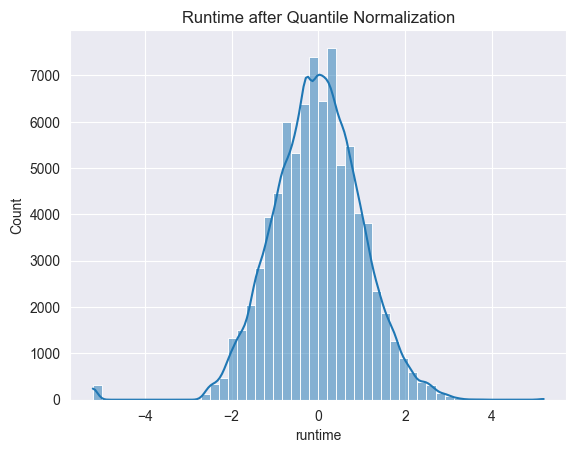

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['runtime'], bins=50, kde=True)
plt.title("Runtime after Quantile Normalization")
plt.show()

In [46]:
df.info()

df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                82918 non-null  object  
 1   runtime              82918 non-null  float64 
 2   overview             82129 non-null  object  
 3   genres               81442 non-null  object  
 4   movieId              82918 non-null  int64   
 5   if_blockbuster       82918 non-null  int32   
 6   highly_watched       82918 non-null  int32   
 7   release_year         82918 non-null  float64 
 8   decade               82863 non-null  category
 9   highly_rated         82918 non-null  int64   
 10  engagement_score     82918 non-null  float64 
 11  semantic_keywords    82918 non-null  object  
 12  cast_importance      82918 non-null  float64 
 13  top_cast_members     82918 non-null  object  
 14  director_score       82918 non-null  float64 
 15  top_directors      

title   runtime  \
0                      Inception  1.942703   
1                   Interstellar  2.432017   
2                The Dark Knight  2.033104   
3                         Avatar  2.256745   
4                   The Avengers  1.824556   
..                           ...       ...   
95       The Empire Strikes Back  1.358913   
96                         Shrek -0.276998   
97                   Ratatouille  0.908975   
98  Kingsman: The Secret Service  1.497997   
99                    La La Land  1.497997   

                                             overview  \
0   Cobb, a skilled thief who commits corporate es...   
1   The adventures of a group of explorers who mak...   
2   Batman raises the stakes in his war on crime. ...   
3   In the 22nd century, a paraplegic Marine is di...   
4   When an unexpected enemy emerges and threatens...   
..                                                ...   
95  The epic saga continues as Luke Skywalker, in ...   
96  It ain't easy bein' green -- especially if you...   
97  Remy, a resident of Paris, appreciates good fo...   
98  The story of a super-secret spy organization t...   
99  Mia, an aspiring actress, serves lattes to mov...   

                                           genres  movieId  if_blockbuster  \
0              Action, Science Fiction, Adventure    79132               1   
1               Adventure, Drama, Science Fiction   109487               1   
2                  Drama, Action, Crime, Thriller    58559               1   
3     Action, Adventure, Fantasy, Science Fiction    72998               1   
4              Science Fiction, Action, Adventure    89745               1   
..                                            ...      ...             ...   
95             Adventure, Action, Science Fiction     1196               1   
96  Animation, Comedy, Fantasy, Adventure, Family     4306               1   
97             Animation, Comedy, Family, Fantasy    50872               1   
98               Crime, Comedy, Action, Adventure   119145               1   
99                  Comedy, Drama, Romance, Music   164909               1   

    highly_watched  release_year        decade  highly_rated  \
0                1        2010.0  [2010, 2020)             1   
1                1        2014.0  [2010, 2020)             1   
2                1        2008.0  [2000, 2010)             1   
3                1        2009.0  [2000, 2010)             1   
4                1        2012.0  [2010, 2020)             1   
..             ...           ...           ...           ...   
95               1        1980.0  [1980, 1990)             1   
96               1        2001.0  [2000, 2010)             1   
97               1        2007.0  [2000, 2010)             1   
98               1        2014.0  [2010, 2020)             1   
99               1        2016.0  [2010, 2020)             1   

    engagement_score                                  semantic_keywords  \
0           4.591432  [kidnapping, allegory, manipulation, mission, ...   
1           5.199338  [2060s, future, complicated, time warp, earth,...   
2           5.199338  [crime fighter, world, anti villain, vigilante...   
3           4.123958  [future, culture clash, joyful, space travel, ...   
4           5.199338  [assembly, required, shield, based on comic, s...   
..               ...                                                ...   
95          3.003738  [rebellion, snowstorm, space colony, swamp, ar...   
96          3.144047  [magic, prince, robin hood, liberation, enchan...   
97          3.133301  [sewer, river, expensive restaurant, confidenc...   
98          3.111676  [man, spy, based on comic, secret agent, secre...   
99          2.948478  [traffic jam, coffee shop, hollywood, fools, p...   

    cast_importance                                   top_cast_members  \
0          2.899632  [Leonardo DiCaprio, Tom Hardy, Joseph Gordon-L...   
1          2.789332  [Anne Hathawa

# Normalizacja danych numerycznych

In [47]:
# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler()
#
# columns_to_normalize = ['engagement_score', 'cast_importance', 'director_score', 'release_year','runtime']
#
# df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
#
# print(df[columns_to_normalize].head())

In [48]:
df.head(10)

title   runtime  \
0                Inception  1.942703   
1             Interstellar  2.432017   
2          The Dark Knight  2.033104   
3                   Avatar  2.256745   
4             The Avengers  1.824556   
5                 Deadpool  0.778225   
6   Avengers: Infinity War  1.962691   
7               Fight Club  1.750222   
8  Guardians of the Galaxy  1.278137   
9             Pulp Fiction  2.063775   

                                            overview  \
0  Cobb, a skilled thief who commits corporate es...   
1  The adventures of a group of explorers who mak...   
2  Batman raises the stakes in his war on crime. ...   
3  In the 22nd century, a paraplegic Marine is di...   
4  When an unexpected enemy emerges and threatens...   
5  The origin story of former Special Forces oper...   
6  As the Avengers and their allies have continue...   
7  A ticking-time-bomb insomniac and a slippery s...   
8  Light years from Earth, 26 years after being a...   
9  A burger-loving hit man, his philosophical par...   

                                        genres  movieId  if_blockbuster  \
0           Action, Science Fiction, Adventure    79132               1   
1            Adventure, Drama, Science Fiction   109487               1   
2               Drama, Action, Crime, Thriller    58559               1   
3  Action, Adventure, Fantasy, Science Fiction    72998               1   
4           Science Fiction, Action, Adventure    89745               1   
5                    Action, Adventure, Comedy   122904               1   
6           Adventure, Action, Science Fiction   122912               1   
7                                        Drama     2959               1   
8           Action, Science Fiction, Adventure   112852               1   
9                              Thriller, Crime      296               1   

   highly_watched  release_year        decade  highly_rated  engagement_score  \
0               1        2010.0  [2010, 2020)             1          4.591432   
1               1        2014.0  [2010, 2020)             1          5.199338   
2               1        2008.0  [2000, 2010)             1          5.199338   
3               1        2009.0  [2000, 2010)             1          4.123958   
4               1        2012.0  [2010, 2020)             1          5.199338   
5               1        2016.0  [2010, 2020)             1          3.971211   
6               1        2018.0  [2010, 2020)             1          5.199338   
7               1        1999.0  [1990, 2000)             1          3.936440   
8               1        2014.0  [2010, 2020)             1          3.554852   
9               1        1994.0  [1990, 2000)             1          3.998178   

                                   semantic_keywords  cast_importance  \
0  [kidnapping, allegory, manipulation, mission, ...         2.899632   
1  [2060s, future, complicated, time warp, earth,...         2.789332   
2  [crime fighter, world, anti villain, vigilante...         3.099369   
3  [future, culture clash, joyful, space travel, ...         2.512635   
4  [assembly, required, shield, based on comic, s...         5.199338   
5  [beginning, ending, duringcreditsstinger, merc...         2.270731   
6  [cosmic, magic, super power, based on comic, s...         5.199338   
7  [soap, mischief, nihilism, alter ego, fight, b...         2.443213   
8  [start, based on comic, aftercreditsstinger, a...         3.595284   
9  [mean, doesnt, dance competition, nonlinear ti...         2.961178   

                                    top_cast_members  director_score  \
0  [Leonardo DiCaprio, Tom Hardy, Joseph Gordon-L...        2.653210   
1  [Anne Hathaway, Matthew McConaughey, Jessica C...        2.653210   
2  [Christian Bale, Gary Oldman, Morgan Freeman, ...        2.653210   
3  [Zoe Salda√±a, Sigourney Weaver, Michelle Rodri...        2.304477   
4  [Scarlett Johansson, Chris Hemsworth, Chris Ev...        1.817788   
5  [Ryan

# Enkodowanie wartosci z kategoriami

In [49]:
# from sklearn.preprocessing import MultiLabelBinarizer
#
# def encode_using_mlb(df, column_name):
#     print(f'Shape before encoding {column_name}: {df.shape}')
#     mlb = MultiLabelBinarizer()
#     encoded = mlb.fit_transform(df[column_name])
#     encoded = pd.DataFrame(encoded, columns=mlb.classes_)
#
#     df = df.reset_index(drop=True)
#     encoded = encoded.reset_index(drop=True)
#     df = df.drop(columns=column_name)
#     df = pd.concat([df, encoded], axis=1)
#     print(f'Shape after encoding {column_name}: {df.shape}')
#
#     return df

df['genre_list'] = df['genres'].str.split(', ')
df = df.drop(columns='genres')
df['genre_list'] = df['genre_list'].fillna('').apply(lambda x: [] if x == '' else x)

# df = encode_using_mlb(df, 'genre_list')

all_genres = sorted(set(g for sublist in df['genre_list'] for g in sublist if g))
genre_to_idx = {g: i for i, g in enumerate(all_genres)}
genre_to_idx['_UNKNOWN_'] = len(genre_to_idx)

df['genre_ids'] = df['genre_list'].apply(
    lambda genres: [genre_to_idx.get(g, genre_to_idx['_UNKNOWN_']) for g in genres] if genres else [genre_to_idx['_UNKNOWN_']]
)

df = df.drop(columns='genre_list')

In [50]:
df = pd.get_dummies(df, columns=['decade'], prefix='decade')

In [51]:
print(df.head())

             title   runtime  \
0        Inception  1.942703   
1     Interstellar  2.432017   
2  The Dark Knight  2.033104   
3           Avatar  2.256745   
4     The Avengers  1.824556   

                                            overview  movieId  if_blockbuster  \
0  Cobb, a skilled thief who commits corporate es...    79132               1   
1  The adventures of a group of explorers who mak...   109487               1   
2  Batman raises the stakes in his war on crime. ...    58559               1   
3  In the 22nd century, a paraplegic Marine is di...    72998               1   
4  When an unexpected enemy emerges and threatens...    89745               1   

   highly_watched  release_year  highly_rated  engagement_score  \
0               1        2010.0             1          4.591432   
1               1        2014.0             1          5.199338   
2               1        2008.0             1          5.199338   
3               1        2009.0             1       

# Enkodowanie warto≈õci tekstowych

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                82918 non-null  object 
 1   runtime              82918 non-null  float64
 2   overview             82129 non-null  object 
 3   movieId              82918 non-null  int64  
 4   if_blockbuster       82918 non-null  int32  
 5   highly_watched       82918 non-null  int32  
 6   release_year         82918 non-null  float64
 7   highly_rated         82918 non-null  int64  
 8   engagement_score     82918 non-null  float64
 9   semantic_keywords    82918 non-null  object 
 10  cast_importance      82918 non-null  float64
 11  top_cast_members     82918 non-null  object 
 12  director_score       82918 non-null  float64
 13  top_directors        82918 non-null  object 
 14  has_keywords         82918 non-null  int64  
 15  has_cast             82918 non-null 

In [53]:
from collections import Counter

TOP_N = 10000 # WE SETUP HOW MANY FEATURES MATTERS (INSTEAD OF TF-IDF)

all_tokens = [token for sublist in df["tokens_combined"] for token in sublist]
token_counts = Counter(all_tokens)
common_tokens = set([token for token, _ in token_counts.most_common(TOP_N)])

common_tokens.add("_UNKNOWN_")
df["filtered_tokens"] = df["tokens_combined"].apply(
    lambda tokens: [t for t in tokens if t in common_tokens] if isinstance(tokens, list) else ["_UNKNOWN_"]
)

In [54]:
df['cleaned_title'] = df['cleaned_title'].apply(
    lambda x: x if isinstance(x, list) and len(x) > 0 else ['_UNKNOWN_']
)

In [55]:
df['text_tokens'] = df.apply(
    lambda row: row['filtered_tokens'] + row['cleaned_title'], axis=1
)

assert df['text_tokens'].apply(lambda x: len(x) > 0).all(), "PUSTE TOKENY!"

In [56]:
print(f"_UNKNOWN_' in text_tokens: {(df['text_tokens'].apply(lambda x: '_UNKNOWN_' in x).mean() * 100):.2f}%")

_UNKNOWN_' in text_tokens: 16.42%


In [57]:
from gensim.models import Word2Vec

sentences = df["text_tokens"].tolist()
sentences = [s for s in sentences if s]
sentences.append(["_UNKNOWN_"])

own_model = Word2Vec(
    sentences=sentences,
    vector_size=300,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)


In [58]:
# TOKENIZING AND CREATING VECTORS FOR LEMMATIZED_KEYWORDS

def average_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else model.wv["_UNKNOWN_"]

df["text_embedded"] = df["text_tokens"].apply(lambda tokens: average_vector(tokens, own_model))


In [59]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similar_movies(df, movie_id, top_n=10):
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    if 'text_embedded' not in df.columns:
        raise ValueError("Brakuje kolumny 'text_embedded'.")

    df['movieId'] = pd.to_numeric(df['movieId'], errors='coerce')

    row = df[df['movieId'] == movie_id]
    if row.empty:
        raise ValueError(f"Nie znaleziono filmu o movieId: {movie_id}")

    vec = row['text_embedded'].values[0]
    if isinstance(vec, list):
        vec = np.array(vec)
    vec = vec.reshape(1, -1)

    all_vecs = np.stack(df['text_embedded'].values)
    similarities = cosine_similarity(vec, all_vecs)[0]

    df['similarity'] = similarities
    title = row['title'].values[0]

    print(f"üéØ Film testowy: {title} (movieId: {movie_id})\n")
    print("üîç Top podobnych film√≥w:")

    similar = df[df['movieId'] != movie_id].sort_values('similarity', ascending=False)
    print(similar[['title', 'similarity']].head(top_n).to_string(index=False))


In [60]:
df.head(10)

title   runtime  \
0                Inception  1.942703   
1             Interstellar  2.432017   
2          The Dark Knight  2.033104   
3                   Avatar  2.256745   
4             The Avengers  1.824556   
5                 Deadpool  0.778225   
6   Avengers: Infinity War  1.962691   
7               Fight Club  1.750222   
8  Guardians of the Galaxy  1.278137   
9             Pulp Fiction  2.063775   

                                            overview  movieId  if_blockbuster  \
0  Cobb, a skilled thief who commits corporate es...    79132               1   
1  The adventures of a group of explorers who mak...   109487               1   
2  Batman raises the stakes in his war on crime. ...    58559               1   
3  In the 22nd century, a paraplegic Marine is di...    72998               1   
4  When an unexpected enemy emerges and threatens...    89745               1   
5  The origin story of former Special Forces oper...   122904               1   
6  As the Avengers and their allies have continue...   122912               1   
7  A ticking-time-bomb insomniac and a slippery s...     2959               1   
8  Light years from Earth, 26 years after being a...   112852               1   
9  A burger-loving hit man, his philosophical par...      296               1   

   highly_watched  release_year  highly_rated  engagement_score  \
0               1        2010.0             1          4.591432   
1               1        2014.0             1          5.199338   
2               1        2008.0             1          5.199338   
3               1        2009.0             1          4.123958   
4               1        2012.0             1          5.199338   
5               1        2016.0             1          3.971211   
6               1        2018.0             1          5.199338   
7               1        1999.0             1          3.936440   
8               1        2014.0             1          3.554852   
9               1        1994.0             1          3.998178   

                                   semantic_keywords  cast_importance  \
0  [kidnapping, allegory, manipulation, mission, ...         2.899632   
1  [2060s, future, complicated, time warp, earth,...         2.789332   
2  [crime fighter, world, anti villain, vigilante...         3.099369   
3  [future, culture clash, joyful, space travel, ...         2.512635   
4  [assembly, required, shield, based on comic, s...         5.199338   
5  [beginning, ending, duringcreditsstinger, merc...         2.270731   
6  [cosmic, magic, super power, based on comic, s...         5.199338   
7  [soap, mischief, nihilism, alter ego, fight, b...         2.443213   
8  [start, based on comic, aftercreditsstinger, a...         3.595284   
9  [mean, doesnt, dance competition, nonlinear ti...         2.961178   

                                    top_cast_members  director_score  \
0  [Leonardo DiCaprio, Tom Hardy, Joseph Gordon-L...        2.653210   
1  [Anne Hathaway, Matthew McConaughey, Jessica C...        2.653210   
2  [Christian Bale, Gary Oldman, Morgan Freeman, ...        2.653210   
3  [Zoe Salda√±a, Sigourney Weaver, Michelle Rodri...        2.304477   
4  [Scarlett Johansson, Chris Hemsworth, Chris Ev...        1.817788   
5  [Ryan Reynolds, T.J. Miller, Karan Soni, Ed Sk...        1.644682   
6  [Scarlett Johansson, Chris Hemsworth, Chris Ev...        2.272505   
7   [Brad Pitt, Edward Norton, Helena Bonham Carter]        2.478370   
8  [Bradley Cooper, Chris Pratt, Vin Diesel, Djim...        2.164474   
9  [Samuel L. Jackson, Bruce Willis, John Travolt...        2.625593   

                top_directors  has_keywords  has_cast  has_director  \
0         [Christopher Nolan]             1         1             1   
1         [Christopher Nolan]             1         1             1   
2         [Christopher Nolan]             1         1             1   
3             [James Cameron]             1         1             1 

In [61]:
show_similar_movies(df, movie_id=296, top_n=5)
df.drop(columns=["similarity"], inplace=True, errors="ignore")

üéØ Film testowy: Pulp Fiction (movieId: 296)

üîç Top podobnych film√≥w:
                title  similarity
         Tango & Cash    0.966620
          Miami Blues    0.965709
A Piece of the Action    0.964034
              Payback    0.963025
       My Blue Heaven    0.962023


In [62]:
# def get_average_w2v_embedding(title_tokens, model):
#     vectors = [model.wv[word] for word in title_tokens if word in model.wv]
#     return np.mean(vectors, axis=0) if vectors else model.wv["_UNKNOWN_"]
#
# df['title_embedded'] = df['cleaned_title'].apply(lambda x: get_average_w2v_embedding(x, own_model))
#
# print(df[['title', 'title_embedded']].head(10))

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                82918 non-null  object 
 1   runtime              82918 non-null  float64
 2   overview             82129 non-null  object 
 3   movieId              82918 non-null  int64  
 4   if_blockbuster       82918 non-null  int32  
 5   highly_watched       82918 non-null  int32  
 6   release_year         82918 non-null  float64
 7   highly_rated         82918 non-null  int64  
 8   engagement_score     82918 non-null  float64
 9   semantic_keywords    82918 non-null  object 
 10  cast_importance      82918 non-null  float64
 11  top_cast_members     82918 non-null  object 
 12  director_score       82918 non-null  float64
 13  top_directors        82918 non-null  object 
 14  has_keywords         82918 non-null  int64  
 15  has_cast             82918 non-null 

In [64]:
# FALLBACK FOR VECTORS THAT EQUALS 0 (NOT NEEDED WHEN WE USE FLAG _UNKNOWN_)

# import numpy as np
#
# def get_fallback_vector(column):
#     vectors = np.stack(column[column.apply(lambda v: np.any(v))].values)
#     return np.mean(vectors, axis=0)
#
# fallback_title = get_fallback_vector(df['title_embedded'])
# fallback_combined = get_fallback_vector(df['keywords_embedded'])
#
# df['title_embedded'] = df['title_embedded'].apply(
#     lambda vec: vec if np.any(vec) else fallback_title
# )
#
# df['keywords_embedded'] = df['keywords_embedded'].apply(
#     lambda vec: vec if np.any(vec) else fallback_combined
# )

In [65]:
actors = ["_UNKNOWN_"] + sorted(set(df['top_cast_members'].explode()))
directors = ["_UNKNOWN_"] + sorted(set(df['top_directors'].explode()))

actor_to_idx = {actor: idx for idx, actor in enumerate(actors)}
director_to_idx = {director: idx for idx, director in enumerate(directors)}

def encode_members(members, member_to_idx):
    return [member_to_idx.get(member, 0) for member in members]  # 0 = _UNKNOWN_

df['actor_ids'] = df['top_cast_members'].apply(lambda x: encode_members(x, actor_to_idx))
df['director_ids'] = df['top_directors'].apply(lambda x: encode_members(x, director_to_idx))

print(df[['title', 'actor_ids', 'director_ids']].head(10))

# actors = df['top_cast_members'].explode().unique()
# directors = df['top_directors'].explode().unique()
#
# actor_to_idx = {actor: idx for idx, actor in enumerate(actors)}
# director_to_idx = {director: idx for idx, director in enumerate(directors)}
#
# def encode_members(members, member_to_idx):
#     return [member_to_idx.get(member, -1) for member in members]
#
# df['actor_ids'] = df['top_cast_members'].apply(lambda x: encode_members(x, actor_to_idx))
# df['director_ids'] = df['top_directors'].apply(lambda x: encode_members(x, director_to_idx))
#
# # self.actor_embedding = nn.Embedding(num_actors, 50)
# # embedded = self.actor_embedding(actor_ids)
#
# print(df[['title', 'actor_ids', 'director_ids']].head(10))

                     title                         actor_ids director_ids
0                Inception   [6454, 10631, 5457, 1952, 5950]        [797]
1             Interstellar    [659, 7298, 4974, 10576, 5292]        [797]
2          The Dark Knight    [1867, 3519, 7812, 1952, 4010]        [797]
3                   Avatar   [11434, 9935, 7629, 9574, 3709]       [2026]
4             The Avengers    [9686, 1839, 1834, 9161, 4923]       [2496]
5                 Deadpool         [9472, 10289, 5752, 2796]       [5144]
6   Avengers: Infinity War    [9686, 1839, 1834, 9161, 7109]  [331, 2279]
7               Fight Club                [1278, 2862, 4040]       [1008]
8  Guardians of the Galaxy  [1282, 1854, 10947, 2608, 11434]       [2041]
9             Pulp Fiction  [9597, 1416, 5349, 10822, 10554]       [3866]


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                82918 non-null  object 
 1   runtime              82918 non-null  float64
 2   overview             82129 non-null  object 
 3   movieId              82918 non-null  int64  
 4   if_blockbuster       82918 non-null  int32  
 5   highly_watched       82918 non-null  int32  
 6   release_year         82918 non-null  float64
 7   highly_rated         82918 non-null  int64  
 8   engagement_score     82918 non-null  float64
 9   semantic_keywords    82918 non-null  object 
 10  cast_importance      82918 non-null  float64
 11  top_cast_members     82918 non-null  object 
 12  director_score       82918 non-null  float64
 13  top_directors        82918 non-null  object 
 14  has_keywords         82918 non-null  int64  
 15  has_cast             82918 non-null 

In [67]:
df.head(87000)

title   runtime  \
0                                    Inception  1.942703   
1                                 Interstellar  2.432017   
2                              The Dark Knight  2.033104   
3                                       Avatar  2.256745   
4                                 The Avengers  1.824556   
...                                        ...       ...   
82913                               Time Again -0.803958   
82914                                 Avicenna -0.119468   
82915                             Black Nation -1.283836   
82916  121: Overcoming Drug Addiction by Faith -0.888309   
82917                           Shelter Island -0.035135   

                                                overview  movieId  \
0      Cobb, a skilled thief who commits corporate es...    79132   
1      The adventures of a group of explorers who mak...   109487   
2      Batman raises the stakes in his war on crime. ...    58559   
3      In the 22nd century, a paraplegic Marine is di...    72998   
4      When an unexpected enemy emerges and threatens...    89745   
...                                                  ...      ...   
82913  We have all made mistakes.  Little white lies ...   160535   
82914  The film is dedicated to the philosopher, doct...   286353   
82915  Black Nation is a compelling film that takes a...   272047   
82916  At the age of 20, Burton Barr Jr. was held dow...   246366   
82917  This unique documentary reveals the story of S...   136560   

       if_blockbuster  highly_watched  release_year  highly_rated  \
0                   1               1        2010.0             1   
1                   1               1        2014.0             1   
2                   1               1        2008.0             1   
3                   1               1        2009.0             1   
4                   1               1        2012.0             1   
...               ...             ...           ...           ...   
82913               0               0        2011.0             0   
82914               0               0        1957.0             0   
82915               0               0        2008.0             0   
82916               0               0        2021.0             0   
82917               0               0        2011.0             0   

       engagement_score                                  semantic_keywords  \
0              4.591432  [kidnapping, allegory, manipulation, mission, ...   
1              5.199338  [2060s, future, complicated, time warp, earth,...   
2              5.199338  [crime fighter, world, anti villain, vigilante...   
3              4.123958  [future, culture clash, joyful, space travel, ...   
4              5.199338  [assembly, required, shield, based on comic, s...   
...                 ...                                                ...   
82913         -5.199338                                                 []   
82914         -2.366351  [history, drama, avitsenna, historical drama, ...   
82915         -5.199338                                                 []   
82916         -5.199338                                                 []   
82917         -5.199338                                                 []   

       cast_importance                                   top_cast_members  \
0             2.899632  [Leonardo DiCaprio, Tom Hardy, Joseph Gordon-L...   
1             2.789332  [Anne Hathaway, Matthew McConaughey, Jessica C...   
2             3.099369  [Christian Bale, Gary Oldman, Morgan Freeman, ...   
3             2.512635  [Zoe Salda√±a, Sigourney Weaver, Michelle Rodri...   
4             5.199338  [Scarlett Johansson, Chris Hemsworth, Chris Ev...   
...                ...                                                ...   
82913        -2.705413                                        [_UNKNOWN_]   
82914        -2.758924                                        [_UNKNOWN_]   
82915        -0.593940         

In [68]:
count_result = count_zeros_and_empty(df)
print(count_result)

{'title': {'empty_strings': 0}, 'runtime': {'zeros': 0}, 'movieId': {'zeros': 0}, 'if_blockbuster': {'zeros': 80654}, 'highly_watched': {'zeros': 75372}, 'release_year': {'zeros': 0}, 'highly_rated': {'zeros': 74668}, 'engagement_score': {'zeros': 0}, 'cast_importance': {'zeros': 0}, 'director_score': {'zeros': 0}, 'has_keywords': {'zeros': 25554}, 'has_cast': {'zeros': 8482}, 'has_director': {'zeros': 8482}, 'decade_[1890, 1900)': {'zeros': 82708}, 'decade_[1900, 1910)': {'zeros': 82623}, 'decade_[1910, 1920)': {'zeros': 82540}, 'decade_[1920, 1930)': {'zeros': 82225}, 'decade_[1930, 1940)': {'zeros': 80655}, 'decade_[1940, 1950)': {'zeros': 80476}, 'decade_[1950, 1960)': {'zeros': 79692}, 'decade_[1960, 1970)': {'zeros': 78890}, 'decade_[1970, 1980)': {'zeros': 77434}, 'decade_[1980, 1990)': {'zeros': 76880}, 'decade_[1990, 2000)': {'zeros': 75146}, 'decade_[2000, 2010)': {'zeros': 68001}, 'decade_[2010, 2020)': {'zeros': 55767}, 'decade_[2020, 2030)': {'zeros': 74952}}


# Zapisanie pliku do PARQUET i finalne przygotowanie danych

In [69]:
movie = df.loc[df['title'] == 'Gladiator']
print(movie)

          title   runtime                                           overview  \
76    Gladiator  2.085356  In the year 180, the death of emperor Marcus A...   
8902  Gladiator  0.464007  Tommy Riley has moved with his dad to Chicago ...   

      movieId  if_blockbuster  highly_watched  release_year  highly_rated  \
76       3578               1               1        2000.0             1   
8902     8132               0               1        1992.0             1   

      engagement_score                                  semantic_keywords  \
76            3.123685  [2nd century, senate, rise, parent child relat...   
8902          1.603455  [illinois, blood splatter, tommy, riley, owns,...   

      cast_importance                                   top_cast_members  \
76           2.298136  [Djimon Hounsou, Joaquin Phoenix, Russell Crow...   
8902         0.830594                  [Cuba Gooding Jr., Brian Dennehy]   

      director_score       top_directors  has_keywords  has_cast  

In [70]:
columns_to_drop = [
    'semantic_keywords',
    'lemmatized_keywords',
    'overview',
    'overview_spacy',
    'tokens_combined',
    'filtered_tokens',
    'title',
    'cleaned_title',
    'top_cast_members',
    'top_directors',
    'text_tokens',
    'release_year'
]

df = df.drop(columns=columns_to_drop)
print('Final shape:', df.shape)

Final shape: (82918, 29)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   runtime              82918 non-null  float64
 1   movieId              82918 non-null  int64  
 2   if_blockbuster       82918 non-null  int32  
 3   highly_watched       82918 non-null  int32  
 4   highly_rated         82918 non-null  int64  
 5   engagement_score     82918 non-null  float64
 6   cast_importance      82918 non-null  float64
 7   director_score       82918 non-null  float64
 8   has_keywords         82918 non-null  int64  
 9   has_cast             82918 non-null  int64  
 10  has_director         82918 non-null  int64  
 11  genre_ids            82918 non-null  object 
 12  decade_[1890, 1900)  82918 non-null  bool   
 13  decade_[1900, 1910)  82918 non-null  bool   
 14  decade_[1910, 1920)  82918 non-null  bool   
 15  decade_[1920, 1930)  82918 non-null 

In [72]:
embedding_columns = ['text_embedded'] # 'title_embedded'

for col in embedding_columns:
    def process(x):
        if hasattr(x, 'detach'):
            x = x.detach().cpu().numpy()
        x = np.array(x, dtype=np.float32)
        if len(x.shape) > 1:
            x = x.mean(axis=0)
        return x

    df[col] = df[col].apply(process)

In [73]:
df.head(10)

runtime  movieId  if_blockbuster  highly_watched  highly_rated  \
0  1.942703    79132               1               1             1   
1  2.432017   109487               1               1             1   
2  2.033104    58559               1               1             1   
3  2.256745    72998               1               1             1   
4  1.824556    89745               1               1             1   
5  0.778225   122904               1               1             1   
6  1.962691   122912               1               1             1   
7  1.750222     2959               1               1             1   
8  1.278137   112852               1               1             1   
9  2.063775      296               1               1             1   

   engagement_score  cast_importance  director_score  has_keywords  has_cast  \
0          4.591432         2.899632        2.653210             1         1   
1          5.199338         2.789332        2.653210             1         1   
2          5.199338         3.099369        2.653210             1         1   
3          4.123958         2.512635        2.304477             1         1   
4          5.199338         5.199338        1.817788             1         1   
5          3.971211         2.270731        1.644682             1         1   
6          5.199338         5.199338        2.272505             1         1   
7          3.936440         2.443213        2.478370             1         1   
8          3.554852         3.595284        2.164474             1         1   
9          3.998178         2.961178        2.625593             1         1   

   has_director      genre_ids  decade_[1890, 1900)  decade_[1900, 1910)  \
0             1     [0, 14, 1]                False                False   
1             1     [1, 6, 14]                False                False   
2             1  [6, 0, 4, 16]                False                False   
3             1  [0, 1, 8, 14]                False                False   
4             1     [14, 0, 1]                False                False   
5             1      [0, 1, 3]                False                False   
6             1     [1, 0, 14]                False                False   
7             1            [6]                False                False   
8             1     [0, 14, 1]                False                False   
9             1        [16, 4]                False                False   

   decade_[1910, 1920)  decade_[1920, 1930)  decade_[1930, 1940)  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   
5                False                False                False   
6                False                False                False   
7                False                False                False   
8                False                False                False   
9                False                False                False   

   decade_[1940, 1950)  decade_[1950, 1960)  decade_[1960, 1970)  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   
5                False                False                False   
6                False                False                False   
7                False                False                False   
8                False                False                False   
9                False                False                False   

   decade_[1970, 

In [74]:
cols = df.columns.tolist()
cols.remove('movieId')
new_order = ['movieId'] + cols

df_final = df[new_order]

In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82918 entries, 0 to 82917
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movieId              82918 non-null  int64  
 1   runtime              82918 non-null  float64
 2   if_blockbuster       82918 non-null  int32  
 3   highly_watched       82918 non-null  int32  
 4   highly_rated         82918 non-null  int64  
 5   engagement_score     82918 non-null  float64
 6   cast_importance      82918 non-null  float64
 7   director_score       82918 non-null  float64
 8   has_keywords         82918 non-null  int64  
 9   has_cast             82918 non-null  int64  
 10  has_director         82918 non-null  int64  
 11  genre_ids            82918 non-null  object 
 12  decade_[1890, 1900)  82918 non-null  bool   
 13  decade_[1900, 1910)  82918 non-null  bool   
 14  decade_[1910, 1920)  82918 non-null  bool   
 15  decade_[1920, 1930)  82918 non-null 

In [76]:
df_final.head(1000)

movieId   runtime  if_blockbuster  highly_watched  highly_rated  \
0      79132  1.942703               1               1             1   
1     109487  2.432017               1               1             1   
2      58559  2.033104               1               1             1   
3      72998  2.256745               1               1             1   
4      89745  1.824556               1               1             1   
..       ...       ...             ...             ...           ...   
995     5389 -0.754664               1               1             1   
996     1884  1.142483               0               1             1   
997   113378  0.232930               1               1             1   
998      733  1.710968               1               1             1   
999   101739 -0.177827               1               1             1   

     engagement_score  cast_importance  director_score  has_keywords  \
0            4.591432         2.899632        2.653210             1   
1            5.199338         2.789332        2.653210             1   
2            5.199338         3.099369        2.653210             1   
3            4.123958         2.512635        2.304477             1   
4            5.199338         5.199338        1.817788             1   
..                ...              ...             ...           ...   
995          2.405705         1.511651        1.390983             1   
996          2.171492         1.910456        1.822531             1   
997          1.937074         1.939330        1.801255             1   
998          2.202957         2.083528        2.509081             1   
999          2.263224         1.132089        1.113532             1   

     has_cast  has_director        genre_ids  decade_[1890, 1900)  \
0           1             1       [0, 14, 1]                False   
1           1             1       [1, 6, 14]                False   
2           1             1    [6, 0, 4, 16]                False   
3           1             1    [0, 1, 8, 14]                False   
4           1             1       [14, 0, 1]                False   
..        ...           ...              ...                  ...   
995         1             1  [2, 1, 3, 7, 6]                False   
996         1             1        [1, 6, 3]                False   
997         1             1          [6, 14]                False   
998         1             1       [0, 1, 16]                False   
999         1             1             [10]                False   

     decade_[1900, 1910)  decade_[1910, 1920)  decade_[1920, 1930)  \
0                  False                False                False   
1                  False                False                False   
2                  False                False                False   
3                  False                False                False   
4                  False                False                False   
..                   ...                  ...                  ...   
995                False                False                False   
996                False                False                False   
997                False                False                False   
998                False                False                False   
999                False                False                False   

     decade_[1930, 1940)  decade_[1940, 1950)  decade_[1950, 1960)  \
0                  False                False                False   
1                  False                False                False   
2                  False                False                False   
3                  False                False                False   
4                  False                False                False   
..                   ...                  ...                  ...   
995                False                False                False   
996                False                False

In [81]:
df_final.to_parquet('Movies_clean_Vec_v4_25keywords.parquet', compression='brotli', index=False)

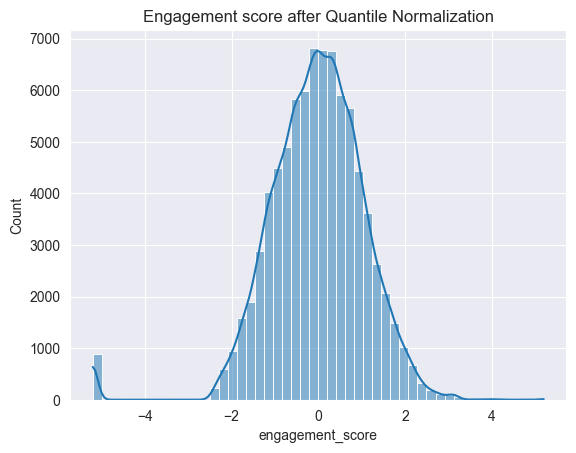

In [82]:
sns.histplot(df['engagement_score'], bins=50, kde=True)
plt.title("Engagement score after Quantile Normalization")
plt.show()